In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import desyshowerdisplay

In [4]:
df = pd.read_csv("/eos/user/a/aiuliano/public/sims_FairShip/sim_DESY19/runs_360events/CSV_datasets/RUN3.csv")

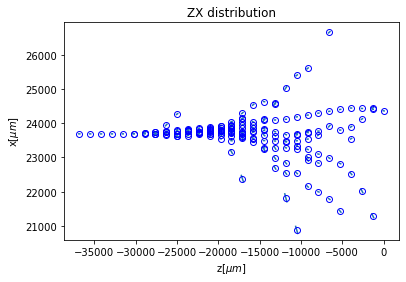

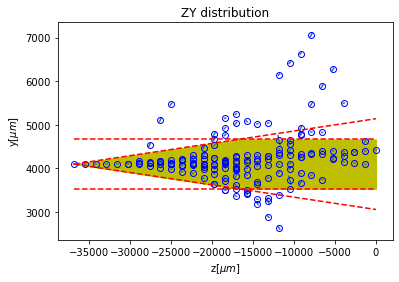

In [5]:
figxz,axisxz = plt.subplots()
figyz,axisyz = plt.subplots()
#desyshowerdisplay.displayshower(df,3,"r",axisyz,axisxz)
desyshowerdisplay.displayshower(df,4,"b",axisyz,axisxz)

df4 = df.query("MCEvent==4")
df4firstplate = df4.query("PID==28")
df4firstplate.reset_index()

starty = df4firstplate.iloc[0]["y"]
dz = 0 -  df4firstplate.iloc[0]["z"]
maxty = 0.04/np.sqrt(2)
endyup = maxty * dz + starty
endydown = -maxty *dz + starty

drmax = 800/np.sqrt(2) #should be a radius, here I am just representing it 1Dimensional

zarr = np.linspace(-dz,0,100)
cilynderup = np.full(100,starty+drmax)
cilynderdown = np.full(100,starty-drmax)
coneup = eval('maxty*zarr+endyup')
conedown = eval('-maxty*zarr+endydown')

#I intersect the regions

intersectionup = np.minimum(cilynderup, coneup)
intersectiondown = np.maximum(cilynderdown,conedown)

axisyz.fill_between(zarr, intersectiondown,intersectionup,color="y")
axisyz.plot(zarr,coneup,"r--")
axisyz.plot(zarr,conedown,"r--")
axisyz.plot(zarr,cilynderup,"r--")
axisyz.plot(zarr,cilynderdown,"r--")
#adding labels
#axisyz.plot([-dz-1000,-dz-1000],[cilynderdown[0],cilynderup[0]],"k--")
#axisyz.text(-dz-1000,(cilynderdown[0]+cilynderup[0])/2.+(cilynderup[0]-cilynderdown[0])/4.,"$\Delta R_{max}$",rotation=90)

#axisyz.plot([zarr[3],zarr[3]],[conedown[3],coneup[3]],"k--")
#axisyz.text(zarr[3],conedown[3]-200,r"2$\alpha$",rotation=90)

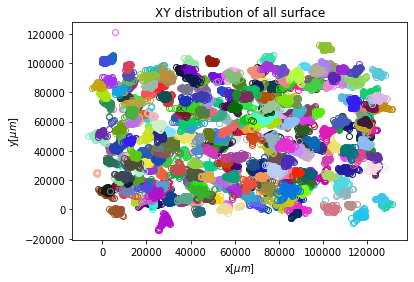

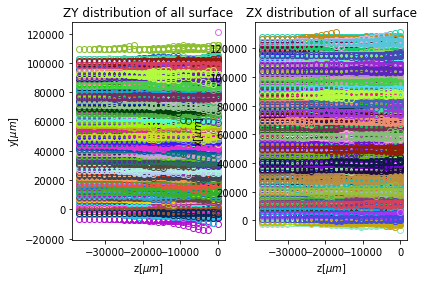

In [6]:
fig1,ax1 = plt.subplots()
fig2,(ax2,ax3) = plt.subplots(1,2)
desyshowerdisplay.drawallshowers(df,360,(ax1,ax2,ax3))

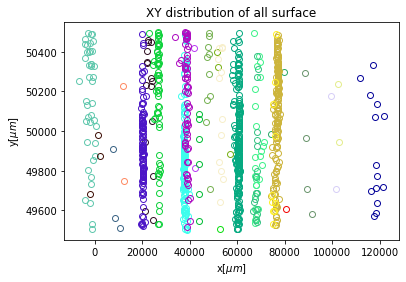

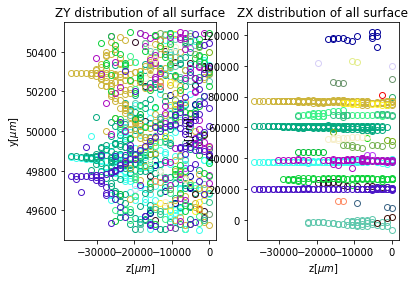

In [7]:
df1mm = df.query("abs(y-50000)<500") #in 1mm along y
fig1bis,ax1bis = plt.subplots()
fig2bis,(ax2bis,ax3bis) = plt.subplots(1,2)
desyshowerdisplay.drawallshowers(df1mm,360,(ax1bis,ax2bis,ax3bis))

In [8]:
df1mm.query("z<-30000").groupby("MCEvent").first()

,ID,PID,x,y,z,TX,TY,MCTrack,P,Flag
MCEvent,,,,,,,,,,
145,31742,23,37450.145,49854.420,-30245.0,0.004817,-0.001576,0,0.912479,11
154,33635,23,60602.582,49868.293,-30245.0,0.005584,-0.000846,0,1.354153,11
164,36009,23,77046.850,50275.836,-30245.0,0.010199,-0.010919,0,0.910832,11
193,42640,23,38800.830,50368.855,-30245.0,-0.010270,-0.104034,55,0.048330,11
213,46719,23,20140.123,49778.793,-30245.0,-0.000741,0.000028,0,4.811267,11


## Focusing on a few overlapped showers, display the array of features

In [9]:
import seaborn as sns;sns.set()

dfmyshowers = df.query("MCEvent in [145,154,164,193,213]")
dfmyshowers = dfmyshowers[["x","y","z","TX","TY","MCEvent"]]

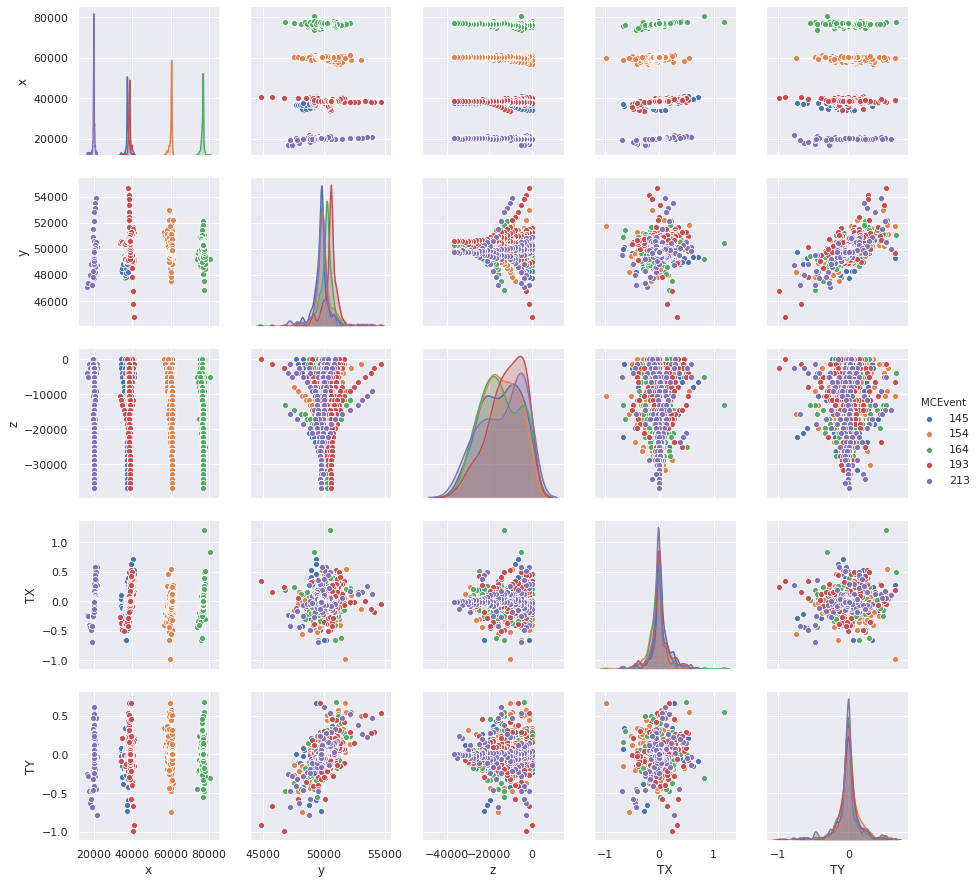

In [10]:
sns.pairplot(dfmyshowers,vars=dfmyshowers.columns[:-1], hue = "MCEvent")

This set is overlapped in y, but not in x, but this is just due to my choose of the set. The angles tell us almost nothing taken alone.

In [11]:
df.query("MCEvent==5").head()

,ID,PID,x,y,z,TX,TY,MCEvent,MCTrack,P,Flag
51,1053,0,75642.836,11348.366,0.0,-0.068161,-0.086258,5,15,0.048340,11
52,1114,0,75250.250,11055.848,0.0,-0.052260,0.011136,5,117,0.071624,-11
53,1123,0,74822.810,11322.007,0.0,-0.063319,-0.005015,5,126,0.208065,-11
54,1138,0,74870.125,12127.540,0.0,0.050133,-0.106168,5,154,0.053828,-11
55,1144,0,74837.300,11010.195,0.0,-0.174153,0.112063,5,159,0.095797,11


In [12]:
len(df.query("MCEvent==5"))

186

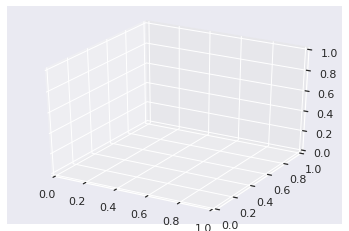

In [24]:
fig3d =  plt.figure()

from mpl_toolkits.mplot3d import Axes3D

ax = fig3d.add_subplot(111, projection='3d')

ax3d.scatter(df4['z'], df4['x'],df4['y'])